In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/normalized_percents.csv", encoding="UTF-8")
df.head()

,MSOA Code,MSOA Name,City Code,City Name,Year,Age: 0 to 4,Age: 10 to 14,Age: 15 to 19,Age: 16 years and over,Age: 20 to 24,...,Unpaid Care: Provides no unpaid care,Vehicles: 1 car or van in household,Vehicles: 2 cars or vans in household,Vehicles: 3 or more cars or vans in household,Vehicles: No cars or vans in household,Welsh: Can speak Welsh,Welsh: Can speak and read but cannot write Welsh,Welsh: Can speak but cannot read or write Welsh,Welsh: No skills in Welsh,Welsh: Other combination of skills in Welsh
0,E02000001,City of London 001,J01000055,London,2001,0.034795,0.025887,0.028671,4044.729019,0.073626,...,0.000000,0.326648,0.042416,0.010604,0.620332,0.0,0.0,0.0,0.0,0.0
1,E02000001,City of London 001,J01000055,London,2011,0.032000,0.022915,0.026712,6307.060746,0.073898,...,0.921898,0.250855,0.039453,0.015735,0.693957,0.0,0.0,0.0,0.0,0.0
2,E02000001,City of London 001,J01000055,London,2021,0.024825,0.020280,0.025175,8004.000000,0.112471,...,0.940755,0.194179,0.025036,0.008752,0.772033,0.0,0.0,0.0,0.0,0.0
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.078403,0.067821,0.061247,2748.110470,0.058201,...,0.000000,0.434894,0.137527,0.031090,0.396489,0.0,0.0,0.0,0.0,0.0
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.092694,0.065830,0.064059,4360.098007,0.062583,...,0.908782,0.437154,0.156285,0.030593,0.375968,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns.values

array(['MSOA Code', 'MSOA Name', 'City Code', 'City Name', 'Year',
       'Age: 0 to 4', 'Age: 10 to 14', 'Age: 15 to 19',
       'Age: 16 years and over', 'Age: 20 to 24', 'Age: 25 to 29',
       'Age: 30 to 44', 'Age: 45 to 59', 'Age: 5 to 9', 'Age: 60 to 64',
       'Age: 65 to 74', 'Age: 75 to 84', 'Age: 85 years and over',
       'Disabled under the Equality Act: Day-to-day activities limited a little',
       'Disabled under the Equality Act: Day-to-day activities limited a lot',
       'Economic Activity: Economically active',
       'Economic Activity: Economically active: Employee: Full-time',
       'Economic Activity: Economically active: Employee: Part-time',
       'Economic Activity: Economically active: Full-time student',
       'Economic Activity: Economically active: In employment',
       'Economic Activity: Economically active: Self-employed',
       'Economic Activity: Economically active: Unemployed',
       'Economic Activity: Economically inactive',
       'Econ

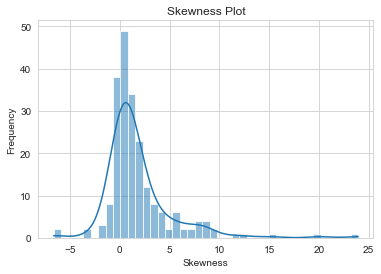

In [4]:
sns.set_style('whitegrid')

skewness = df.skew()

sns.histplot(skewness, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Skewness Plot')
plt.show()

In [5]:
top_cities = ['London', 'Bristol', 'Cardiff']
bottom_cities = ['Coventry', 'Leicester', 'Nottingham']

def set_study_city(city):
    if city in top_cities:
        return 'Top City'
    elif city in bottom_cities:
        return 'Bottom City'
    else:
        return 'Other City'

# Qualifcation

In [6]:
df_Qualification=df[['MSOA Code', 'MSOA Name', 'City Code', 'City Name', 'Year',
                       'Highest Level of Qualification: Apprenticeship',
                       'Highest Level of Qualification: Level 1 and entry level qualifications',
                       'Highest Level of Qualification: Level 2 qualifications',
                       'Highest Level of Qualification: Level 3 qualifications',
                       'Highest Level of Qualification: Level 4 qualifications or above',
                       'Highest Level of Qualification: No qualifications',
                       'Highest Level of Qualification: Other qualifications','Median house price']].rename(columns={
                        'Highest Level of Qualification: Apprenticeship': 'Apprenticeship',
                        'Highest Level of Qualification: Level 1 and entry level qualifications': 'Level 1',
                        'Highest Level of Qualification: Level 2 qualifications': 'Level 2',
                        'Highest Level of Qualification: Level 3 qualifications': 'Level 3',
                        'Highest Level of Qualification: Level 4 qualifications or above': 'Level 4 or above',
                        'Highest Level of Qualification: No qualifications': 'No qualifications',
                        'Highest Level of Qualification: Other qualifications': 'Other qualifications'})

In [7]:
df_Qualification = df_Qualification.drop(df_Qualification[df_Qualification['Median house price'] == 0].index)
df_Qualification['Study_City'] = df_Qualification['City Name'].apply(set_study_city)
df_Qualification = df_Qualification[df_Qualification['Study_City'] != 'Other City'].copy()

df_Qualification.reset_index(drop=True, inplace=True)
df_Qualification


,MSOA Code,MSOA Name,City Code,City Name,Year,Apprenticeship,Level 1,Level 2,Level 3,Level 4 or above,No qualifications,Other qualifications,Median house price,Study_City
0,E02000001,City of London 001,J01000055,London,2001,0.000000,0.059173,0.104500,0.109609,0.601121,0.100049,0.025548,360055.757447,Top City
1,E02000001,City of London 001,J01000055,London,2011,0.006958,0.043079,0.065877,0.071651,0.683642,0.067209,0.061584,555275.633324,Top City
2,E02000001,City of London 001,J01000055,London,2021,0.009993,0.027854,0.048963,0.088434,0.741819,0.066075,0.016862,814000.000000,Top City
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.000000,0.208394,0.169820,0.045124,0.090005,0.414605,0.072052,144022.302979,Top City
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.023487,0.157046,0.140525,0.095342,0.181927,0.323049,0.078623,220916.112183,Top City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,W02000412,Cardiff 046,J01000020,Cardiff,2021,0.040451,0.083857,0.111747,0.144256,0.334873,0.251570,0.033247,209000.000000,Top City
3538,W02000422,Cardiff 048,J01000020,Cardiff,2011,0.011472,0.069188,0.094103,0.118122,0.608711,0.049113,0.049292,161209.054836,Top City
3539,W02000422,Cardiff 048,J01000020,Cardiff,2021,0.020117,0.035880,0.076115,0.142621,0.642546,0.064855,0.017865,170000.000000,Top City
3540,W02000423,Cardiff 049,J01000020,Cardiff,2011,0.014489,0.086501,0.101851,0.100703,0.412710,0.218477,0.065270,163597.337130,Top City


In [8]:
df_Qualification['Max Qualification'] = df_Qualification[['Apprenticeship',
                       'Level 1',
                       'Level 2',
                       'Level 3',
                       'Level 4 or above',
                       'No qualifications',
                       'Other qualifications']].max(axis=1)

df_Qualification['Max Qualification Name'] = df_Qualification[['Apprenticeship',
                       'Level 1',
                       'Level 2',
                       'Level 3',
                       'Level 4 or above',
                       'No qualifications',
                       'Other qualifications']].idxmax(axis=1)

qualification_order = ['Apprenticeship',
                       'Level 1',
                       'Level 2',
                       'Level 3',
                       'Level 4 or above',
                       'No qualifications',
                       'Other qualifications']

df_Qualification['Max Qualification Name'] = pd.Categorical(df_Qualification['Max Qualification Name'], categories=qualification_order, ordered=True)
df_Qualification.head()

,MSOA Code,MSOA Name,City Code,City Name,Year,Apprenticeship,Level 1,Level 2,Level 3,Level 4 or above,No qualifications,Other qualifications,Median house price,Study_City,Max Qualification,Max Qualification Name
0,E02000001,City of London 001,J01000055,London,2001,0.000000,0.059173,0.104500,0.109609,0.601121,0.100049,0.025548,360055.757447,Top City,0.601121,Level 4 or above
1,E02000001,City of London 001,J01000055,London,2011,0.006958,0.043079,0.065877,0.071651,0.683642,0.067209,0.061584,555275.633324,Top City,0.683642,Level 4 or above
2,E02000001,City of London 001,J01000055,London,2021,0.009993,0.027854,0.048963,0.088434,0.741819,0.066075,0.016862,814000.000000,Top City,0.741819,Level 4 or above
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.000000,0.208394,0.169820,0.045124,0.090005,0.414605,0.072052,144022.302979,Top City,0.414605,No qualifications
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.023487,0.157046,0.140525,0.095342,0.181927,0.323049,0.078623,220916.112183,Top City,0.323049,No qualifications


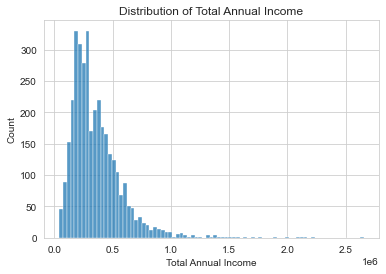

In [9]:
sns.histplot(df_Qualification['Median house price'])
plt.xlabel('Total Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Total Annual Income')
plt.show()

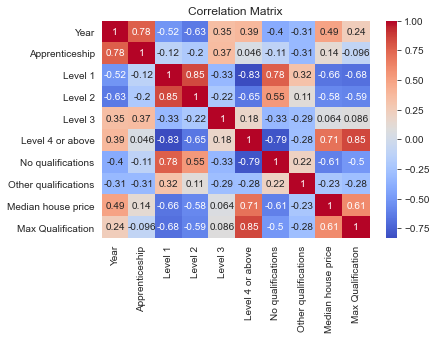

In [10]:
corr_matrix = df_Qualification.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

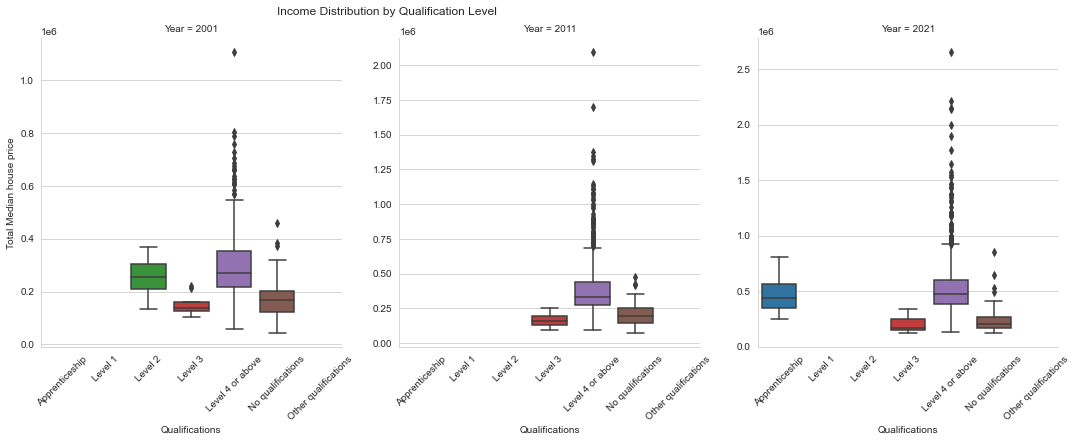

In [11]:
sns.set_style('whitegrid')

g = sns.catplot(data=df_Qualification, x='Max Qualification Name', y='Median house price', col='Year', kind='box', col_wrap=3,  sharey=False)
g.set_axis_labels('Qualifications', 'Total Median house price')
g.fig.suptitle('Income Distribution by Qualification Level', y=1.02, x=0.35)
g.set_xticklabels(rotation=45)  
plt.xticks(rotation=45)  
plt.show()

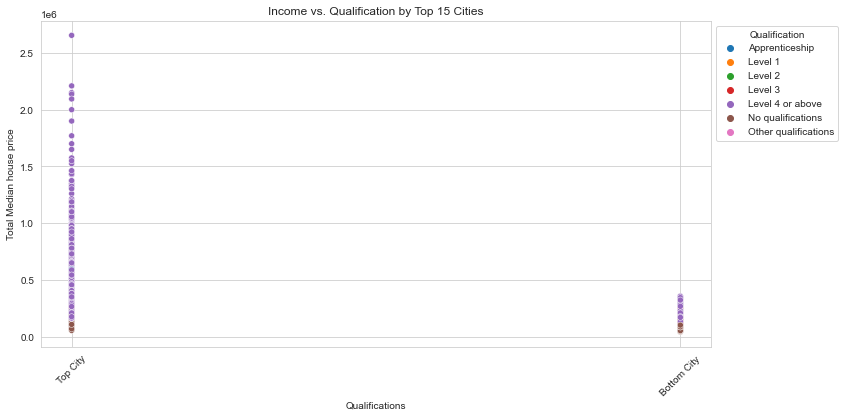

In [12]:
city_counts = df_Qualification['City Name'].value_counts()
top_15_cities = city_counts.head(15).index
df_top_15_cities = df_Qualification[df_Qualification['City Name'].isin(top_15_cities)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_15_cities, x='Study_City', y='Median house price', hue='Max Qualification Name')
plt.xlabel('Qualifications')
plt.ylabel('Total Median house price')
plt.title('Income vs. Qualification by Top 15 Cities')
plt.xticks(rotation=45)  
plt.legend(title='Qualification', bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

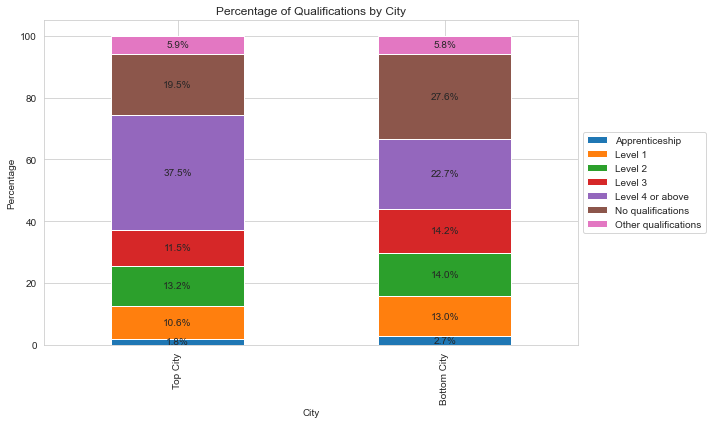

In [13]:
df_Qualification_grouped = df_Qualification.groupby('Study_City').sum()
df_Qualification_grouped = df_Qualification_grouped.sort_values(by=df_Qualification_grouped.columns.tolist(), ascending=False).head(15)
df_Qualification_grouped = df_Qualification_grouped[['Apprenticeship',
                       'Level 1',
                       'Level 2',
                       'Level 3',
                       'Level 4 or above',
                       'No qualifications',
                       'Other qualifications']]
df_Qualification_percentages = df_Qualification_grouped.div(df_Qualification_grouped.sum(axis=1), axis=0).mul(100)


fig, ax = plt.subplots(figsize=(10, 6))
df_Qualification_percentages.plot(kind='bar', stacked=True, ax=ax)

plt.title('Percentage of Qualifications by City')
plt.xlabel('City')
plt.ylabel('Percentage')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

fig.tight_layout()

plt.show()

In [14]:
summary_stats = df_Qualification.groupby('Year')['Median house price'].describe()
print(summary_stats)

       count           mean            std            min            25%  \
Year                                                                       
2001  1139.0  231866.626640  113521.988179   42031.772106  162214.593881   
2011  1189.0  339066.513198  188816.353823   69857.257096  226886.817917   
2021  1214.0  501592.955931  252383.697765  119500.000000  365000.000000   

                50%            75%           max  
Year                                              
2001  210727.369622  278948.460506  1.106698e+06  
2011  298475.579676  401828.495943  2.094524e+06  
2021  462500.000000  595000.000000  2.655500e+06  


# Occupation

In [15]:
df_Occupation=df[['MSOA Code', 'MSOA Name', 'City Code', 'City Name', 'Year',
                       'Occupation: Administrative and secretarial occupations',
                       'Occupation: Associate professional and technical occupations',
                       'Occupation: Caring, leisure and other service occupations',
                       'Occupation: Elementary occupations',
                       'Occupation: Managers, directors and senior officials',
                       'Occupation: Process, plant and machine operatives',
                       'Occupation: Professional occupations',
                       'Occupation: Sales and customer service occupations',
                       'Occupation: Skilled trades occupations','Median house price']].rename(columns={
                        'Occupation: Administrative and secretarial occupations': 'Admin and secretarial',
                        'Occupation: Associate professional and technical occupations': 'Assoc. professional and technical',
                        'Occupation: Caring, leisure and other service occupations': 'Caring and service',
                        'Occupation: Elementary occupations': 'Elementary',
                        'Occupation: Managers, directors and senior officials': 'Managers and senior officials',
                        'Occupation: Process, plant and machine operatives': 'Process, plant, and machine operatives',
                        'Occupation: Professional occupations': 'Professional',
                        'Occupation: Sales and customer service occupations': 'Sales and customer service',
                        'Occupation: Skilled trades occupations': 'Skilled trades'})

In [16]:
df_Occupation = df_Occupation.drop(df_Occupation[df_Occupation['Median house price'] == 0].index)

df_Occupation['Study_City'] = df_Occupation['City Name'].apply(set_study_city)
df_Occupation = df_Occupation[df_Occupation['Study_City'] != 'Other City'].copy()

df_Occupation.reset_index(drop=True, inplace=True)
df_Occupation

,MSOA Code,MSOA Name,City Code,City Name,Year,Admin and secretarial,Assoc. professional and technical,Caring and service,Elementary,Managers and senior officials,"Process, plant, and machine operatives",Professional,Sales and customer service,Skilled trades,Median house price,Study_City
0,E02000001,City of London 001,J01000055,London,2001,0.106760,0.223077,0.029138,0.041026,0.237529,0.011655,0.313287,0.022145,0.015385,360055.757447,Top City
1,E02000001,City of London 001,J01000055,London,2011,0.070571,0.231093,0.026964,0.036444,0.178007,0.010954,0.398989,0.022962,0.024015,555275.633324,Top City
2,E02000001,City of London 001,J01000055,London,2021,0.049944,0.192106,0.028432,0.033296,0.206510,0.009353,0.439394,0.022821,0.018144,814000.000000,Top City
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.171587,0.109317,0.070572,0.151292,0.111162,0.094096,0.055812,0.094096,0.142066,144022.302979,Top City
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.130769,0.092713,0.122267,0.133198,0.065587,0.088259,0.136032,0.105668,0.125506,220916.112183,Top City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,W02000412,Cardiff 046,J01000020,Cardiff,2021,0.102512,0.130346,0.107604,0.119484,0.081127,0.076035,0.198235,0.108622,0.076035,209000.000000,Top City
3538,W02000422,Cardiff 048,J01000020,Cardiff,2011,0.115945,0.197600,0.048435,0.054222,0.118088,0.020574,0.315259,0.086369,0.043506,161209.054836,Top City
3539,W02000422,Cardiff 048,J01000020,Cardiff,2021,0.087726,0.185200,0.053312,0.055102,0.119157,0.028645,0.350308,0.077581,0.042968,170000.000000,Top City
3540,W02000423,Cardiff 049,J01000020,Cardiff,2011,0.095026,0.185359,0.067809,0.096434,0.095964,0.034960,0.268419,0.099249,0.056781,163597.337130,Top City


In [17]:
df_Occupation['Max Occupation'] = df_Occupation[['Admin and secretarial', 
                                                       'Assoc. professional and technical',
                                                       'Caring and service', 
                                                       'Elementary',
                                                       'Managers and senior officials',
                                                       'Process, plant, and machine operatives', 
                                                       'Professional',
                                                       'Sales and customer service', 
                                                       'Skilled trades']].max(axis=1)

df_Occupation['Max Occupation Name'] = df_Occupation[['Admin and secretarial', 
                                                       'Assoc. professional and technical',
                                                       'Caring and service', 
                                                       'Elementary',
                                                       'Managers and senior officials',
                                                       'Process, plant, and machine operatives', 
                                                       'Professional',
                                                       'Sales and customer service', 
                                                       'Skilled trades']].idxmax(axis=1)
Occupation_order = ['Admin and secretarial', 
                   'Assoc. professional and technical',
                   'Caring and service', 
                   'Elementary',
                   'Managers and senior officials',
                   'Process, plant, and machine operatives', 
                   'Professional',
                   'Sales and customer service', 
                   'Skilled trades']
df_Occupation['Max Occupation Name'] = pd.Categorical(df_Occupation['Max Occupation Name'], categories=Occupation_order, ordered=True)
df_Occupation.head()

,MSOA Code,MSOA Name,City Code,City Name,Year,Admin and secretarial,Assoc. professional and technical,Caring and service,Elementary,Managers and senior officials,"Process, plant, and machine operatives",Professional,Sales and customer service,Skilled trades,Median house price,Study_City,Max Occupation,Max Occupation Name
0,E02000001,City of London 001,J01000055,London,2001,0.106760,0.223077,0.029138,0.041026,0.237529,0.011655,0.313287,0.022145,0.015385,360055.757447,Top City,0.313287,Professional
1,E02000001,City of London 001,J01000055,London,2011,0.070571,0.231093,0.026964,0.036444,0.178007,0.010954,0.398989,0.022962,0.024015,555275.633324,Top City,0.398989,Professional
2,E02000001,City of London 001,J01000055,London,2021,0.049944,0.192106,0.028432,0.033296,0.206510,0.009353,0.439394,0.022821,0.018144,814000.000000,Top City,0.439394,Professional
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.171587,0.109317,0.070572,0.151292,0.111162,0.094096,0.055812,0.094096,0.142066,144022.302979,Top City,0.171587,Admin and secretarial
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.130769,0.092713,0.122267,0.133198,0.065587,0.088259,0.136032,0.105668,0.125506,220916.112183,Top City,0.136032,Professional


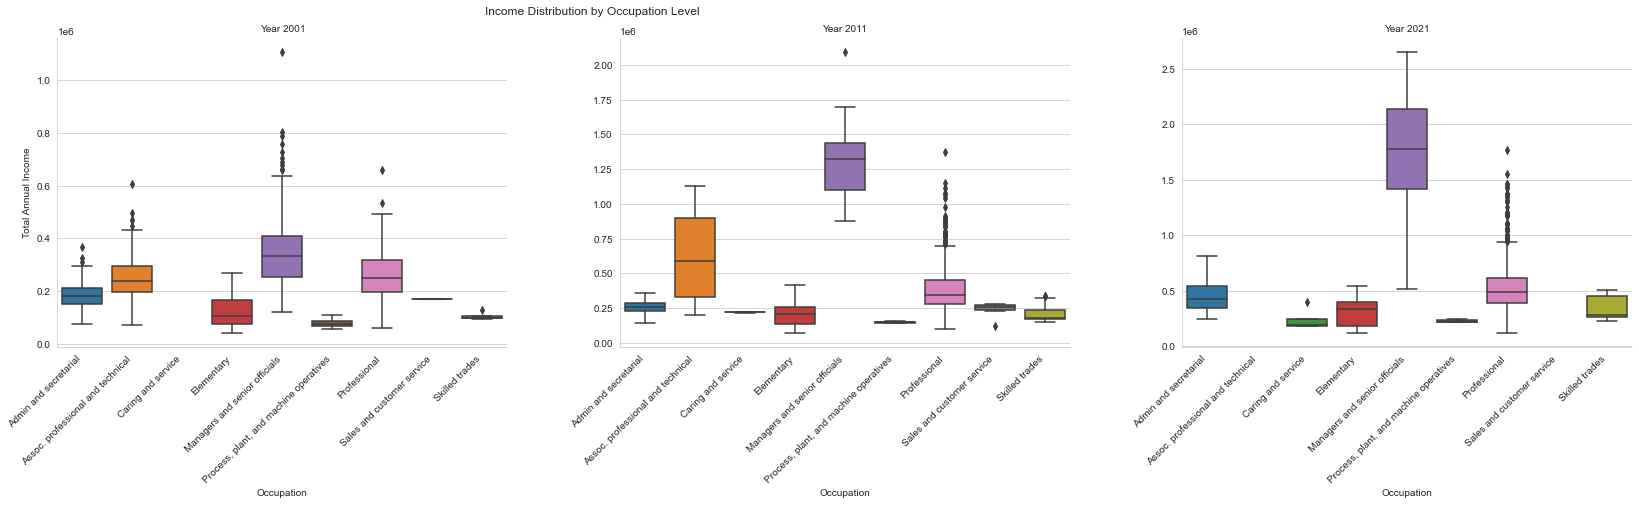

In [18]:
sns.set_style('whitegrid')

g = sns.catplot(data=df_Occupation, x='Max Occupation Name', y='Median house price', col='Year', kind='box', col_wrap=3, aspect=1.5, sharey=False)
g.set_axis_labels('Occupation', 'Total Annual Income')
g.fig.suptitle('Income Distribution by Occupation Level', y=1.02, x=0.35)
g.set_xticklabels(rotation=45, ha='right')  
g.set_titles(row_template='{row_name}', col_template='Year {col_name}')  
plt.subplots_adjust(hspace=0.4, wspace=0.25)  
plt.show()

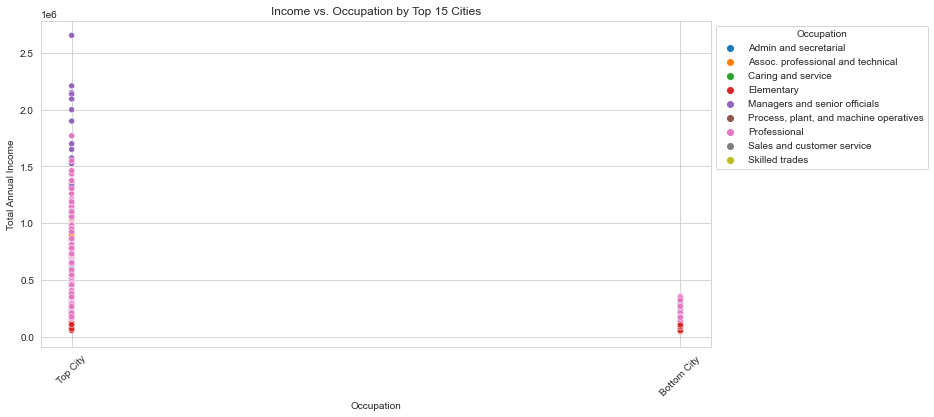

In [19]:
city_counts = df_Occupation['Study_City'].value_counts()
top_15_cities = city_counts.head(15).index
df_top_15_cities = df_Occupation[df_Occupation['Study_City'].isin(top_15_cities)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_15_cities, x='Study_City', y='Median house price', hue='Max Occupation Name')
plt.xlabel('Occupation')
plt.ylabel('Total Annual Income')
plt.title('Income vs. Occupation by Top 15 Cities')
plt.xticks(rotation=45)  
plt.legend(title='Occupation', bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

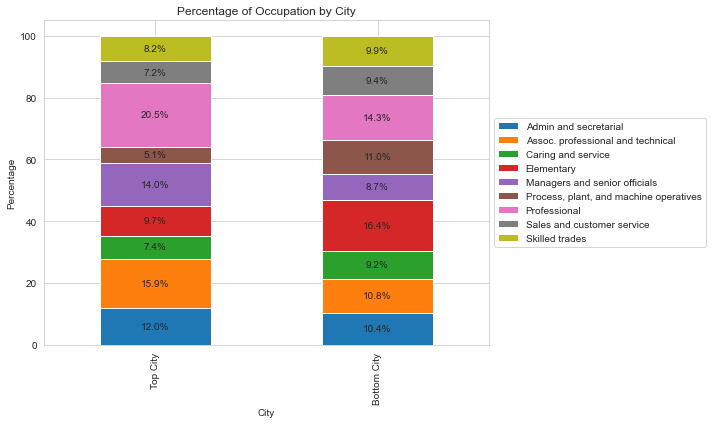

In [20]:
df_Occupation_grouped = df_Occupation.groupby('Study_City').sum()
df_Occupation_grouped = df_Occupation_grouped.sort_values(by=df_Occupation_grouped.columns.tolist(), ascending=False).head(15)
df_Occupation_grouped = df_Occupation_grouped[['Admin and secretarial', 
                   'Assoc. professional and technical',
                   'Caring and service', 
                   'Elementary',
                   'Managers and senior officials',
                   'Process, plant, and machine operatives', 
                   'Professional',
                   'Sales and customer service', 
                   'Skilled trades']]
df_Occupation_percentages = df_Occupation_grouped.div(df_Occupation_grouped.sum(axis=1), axis=0).mul(100)

fig, ax = plt.subplots(figsize=(10, 6))
df_Occupation_percentages.plot(kind='bar', stacked=True, ax=ax)

plt.title('Percentage of Occupation by City')
plt.xlabel('City')
plt.ylabel('Percentage')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

fig.tight_layout()

# Industry

In [21]:
df_Industry=df[['MSOA Code', 'MSOA Name', 'City Code', 'City Name', 'Year',
                       'Industry: A: Agriculture, Forestry and fishing',
                       'Industry: B: Mining and quarrying', 'Industry: C: Manufacturing',
                       'Industry: D: Electricity, gas, steam and air conditioning supply',
                       'Industry: E:  Water supply; Sewerage, Waste management and Remediation activities',
                       'Industry: F: Construction',
                       'Industry: G: Wholesale and retail trade; repair of motor vehicles and motorcycles',
                       'Industry: H: Transport and storage',
                       'Industry: I: Accommodation and food service activities',
                       'Industry: J: Information and communication',
                       'Industry: K: Financial and insurance activities',
                       'Industry: L: Real estate activities',
                       'Industry: M: Professional, scientific and technical activities',
                       'Industry: N: Administrative and support service activities',
                       'Industry: O: Public administration and defence; compulsory social security',
                       'Industry: P: Education',
                       'Industry: Q: Human health and social work activities',
                       'Industry: R, S, T, U Other', 
                        'Median house price']].rename(columns={
                        'Industry: A: Agriculture, Forestry and fishing': 'Agriculture',
                        'Industry: B: Mining and quarrying': 'Mining',
                        'Industry: C: Manufacturing': 'Manufacturing',
                        'Industry: D: Electricity, gas, steam and air conditioning supply': 'Energy supply',
                        'Industry: E:  Water supply; Sewerage, Waste management and Remediation activities': 'Water and waste management',
                        'Industry: F: Construction': 'Construction',
                        'Industry: G: Wholesale and retail trade; repair of motor vehicles and motorcycles': 'Wholesale and retail trade',
                        'Industry: H: Transport and storage': 'Transport and storage',
                        'Industry: I: Accommodation and food service activities': 'Accommodation and food services',
                        'Industry: J: Information and communication': 'Information and communication',
                        'Industry: K: Financial and insurance activities': 'Finance and insurance',
                        'Industry: L: Real estate activities': 'Real estate',
                        'Industry: M: Professional, scientific and technical activities': 'Professional and technical',
                        'Industry: N: Administrative and support service activities': 'Administrative and support services',
                        'Industry: O: Public administration and defence; compulsory social security': 'Public administration and defence',
                        'Industry: P: Education': 'Education',
                        'Industry: Q: Human health and social work activities': 'Health and social work',
                        'Industry: R, S, T, U Other': 'Other industries'})

In [22]:
df_Industry = df_Industry.drop(df_Industry[df_Industry['Median house price'] == 0].index)

df_Industry['Study_City'] = df_Industry['City Name'].apply(set_study_city)
df_Industry = df_Industry[df_Industry['Study_City'] != 'Other City'].copy()

df_Industry.reset_index(drop=True, inplace=True)
df_Industry

,MSOA Code,MSOA Name,City Code,City Name,Year,Agriculture,Mining,Manufacturing,Energy supply,Water and waste management,...,Finance and insurance,Real estate,Professional and technical,Administrative and support services,Public administration and defence,Education,Health and social work,Other industries,Median house price,Study_City
0,E02000001,City of London 001,J01000055,London,2001,0.001282,0.000000,0.004720,0.047086,0.002797,...,0.342657,0.059441,0.053380,0.079487,0.022902,0.022902,0.022902,0.022902,360055.757447,Top City
1,E02000001,City of London 001,J01000055,London,2011,0.000562,0.001896,0.014535,0.001404,0.001685,...,0.224774,0.013693,0.266484,0.037076,0.041289,0.068675,0.052244,0.070782,555275.633324,Top City
2,E02000001,City of London 001,J01000055,London,2021,0.000000,0.000187,0.019993,0.000374,0.000374,...,0.198617,0.016442,0.236360,0.036248,0.041106,0.070067,0.063528,0.080904,814000.000000,Top City
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.004146,0.000000,0.002073,0.088899,0.003455,...,0.131737,0.040534,0.053432,0.113312,0.012552,0.012552,0.012552,0.012552,144022.302979,Top City
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.001619,0.000000,0.040891,0.003239,0.006883,...,0.043320,0.017409,0.048583,0.063563,0.051822,0.077328,0.167206,0.042105,220916.112183,Top City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,W02000412,Cardiff 046,J01000020,Cardiff,2021,0.000000,0.000000,0.030149,0.008808,0.012195,...,0.038957,0.014566,0.064363,0.046409,0.094851,0.099255,0.156504,0.053523,209000.000000,Top City
3538,W02000422,Cardiff 048,J01000020,Cardiff,2011,0.000429,0.001286,0.052079,0.022075,0.004929,...,0.091299,0.013716,0.107158,0.040506,0.091513,0.097728,0.109301,0.061509,161209.054836,Top City
3539,W02000422,Cardiff 048,J01000020,Cardiff,2021,0.000397,0.000000,0.043712,0.008345,0.007153,...,0.091198,0.013710,0.106894,0.039142,0.095172,0.099940,0.134910,0.054838,170000.000000,Top City
3540,W02000423,Cardiff 049,J01000020,Cardiff,2011,0.000000,0.002112,0.051619,0.021586,0.007274,...,0.078367,0.013139,0.089864,0.050446,0.072970,0.091272,0.119193,0.063351,163597.337130,Top City


In [23]:
df_Industry['Max Industry'] = df_Industry[['Agriculture', 'Mining', 'Manufacturing', 'Energy supply',
                                               'Water and waste management', 'Construction',
                                               'Wholesale and retail trade', 'Transport and storage',
                                               'Accommodation and food services', 'Information and communication',
                                               'Finance and insurance', 'Real estate',
                                               'Professional and technical',
                                               'Administrative and support services',
                                               'Public administration and defence', 'Education',
                                               'Health and social work', 'Other industries']].max(axis=1)

df_Industry['Max Industry Name'] = df_Industry[['Agriculture', 'Mining', 'Manufacturing', 'Energy supply',
                                               'Water and waste management', 'Construction',
                                               'Wholesale and retail trade', 'Transport and storage',
                                               'Accommodation and food services', 'Information and communication',
                                               'Finance and insurance', 'Real estate',
                                               'Professional and technical',
                                               'Administrative and support services',
                                               'Public administration and defence', 'Education',
                                               'Health and social work', 'Other industries']].idxmax(axis=1)

Industry_order = ['Agriculture', 'Mining', 'Manufacturing', 'Energy supply',
                                               'Water and waste management', 'Construction',
                                               'Wholesale and retail trade', 'Transport and storage',
                                               'Accommodation and food services', 'Information and communication',
                                               'Finance and insurance', 'Real estate',
                                               'Professional and technical',
                                               'Administrative and support services',
                                               'Public administration and defence', 'Education',
                                               'Health and social work', 'Other industries']
df_Industry['Max Industry Name'] = pd.Categorical(df_Industry['Max Industry Name'], categories=Industry_order, ordered=True)
df_Industry.head()

,MSOA Code,MSOA Name,City Code,City Name,Year,Agriculture,Mining,Manufacturing,Energy supply,Water and waste management,...,Professional and technical,Administrative and support services,Public administration and defence,Education,Health and social work,Other industries,Median house price,Study_City,Max Industry,Max Industry Name
0,E02000001,City of London 001,J01000055,London,2001,0.001282,0.000000,0.004720,0.047086,0.002797,...,0.053380,0.079487,0.022902,0.022902,0.022902,0.022902,360055.757447,Top City,0.342657,Finance and insurance
1,E02000001,City of London 001,J01000055,London,2011,0.000562,0.001896,0.014535,0.001404,0.001685,...,0.266484,0.037076,0.041289,0.068675,0.052244,0.070782,555275.633324,Top City,0.266484,Professional and technical
2,E02000001,City of London 001,J01000055,London,2021,0.000000,0.000187,0.019993,0.000374,0.000374,...,0.236360,0.036248,0.041106,0.070067,0.063528,0.080904,814000.000000,Top City,0.236360,Professional and technical
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.004146,0.000000,0.002073,0.088899,0.003455,...,0.053432,0.113312,0.012552,0.012552,0.012552,0.012552,144022.302979,Top City,0.193459,Wholesale and retail trade
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.001619,0.000000,0.040891,0.003239,0.006883,...,0.048583,0.063563,0.051822,0.077328,0.167206,0.042105,220916.112183,Top City,0.171660,Wholesale and retail trade


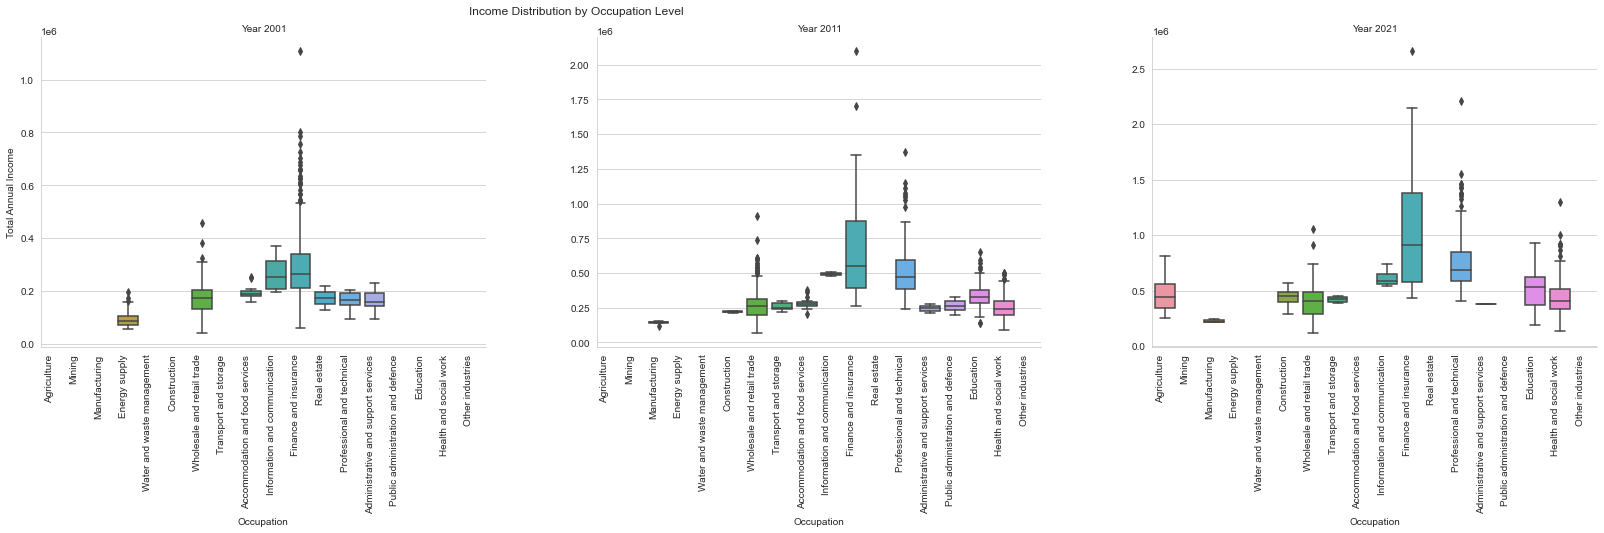

In [24]:
sns.set_style('whitegrid')

g = sns.catplot(data=df_Industry, x='Max Industry Name', y='Median house price', col='Year', kind='box', col_wrap=3, aspect=1.5, sharey=False)
g.set_axis_labels('Occupation', 'Total Annual Income')
g.fig.suptitle('Income Distribution by Occupation Level', y=1.02, x=0.35)
g.set_xticklabels(rotation=90, ha='right')  
g.set_titles(row_template='{row_name}', col_template='Year {col_name}')  
plt.subplots_adjust(hspace=0.4, wspace=0.25)  
plt.show()

Index(['Top City', 'Bottom City'], dtype='object')


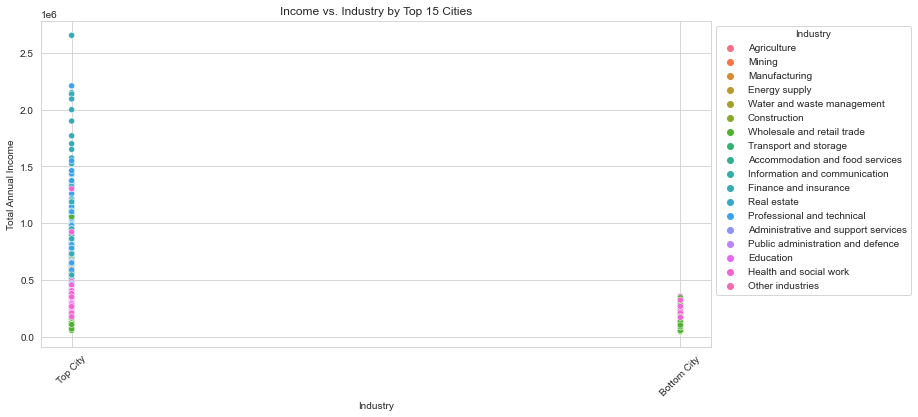

In [25]:
city_counts = df_Industry['Study_City'].value_counts()
top_15_cities = city_counts.head(15).index
df_top_15_cities = df_Industry[df_Industry['Study_City'].isin(top_15_cities)]
print(top_15_cities)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_15_cities, x='Study_City', y='Median house price', hue='Max Industry Name')
plt.xlabel('Industry')
plt.ylabel('Total Annual Income')
plt.title('Income vs. Industry by Top 15 Cities')
plt.xticks(rotation=45)  
plt.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

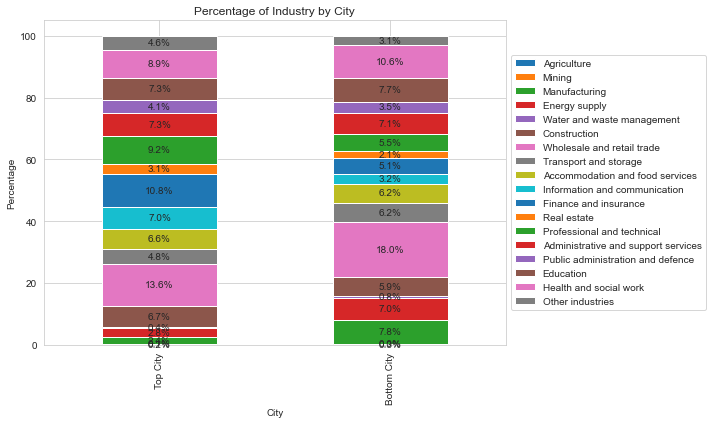

In [26]:
df_Industry_grouped = df_Industry.groupby('Study_City').sum()
df_Industry_grouped = df_Industry_grouped.sort_values(by=df_Industry_grouped.columns.tolist(), ascending=False).head(15)
df_Industry_grouped = df_Industry_grouped[Industry_order]
df_Industry_percentages = df_Industry_grouped.div(df_Industry_grouped.sum(axis=1), axis=0).mul(100)

fig, ax = plt.subplots(figsize=(10, 6))
df_Industry_percentages.plot(kind='bar', stacked=True, ax=ax)

plt.title('Percentage of Industry by City')
plt.xlabel('City')
plt.ylabel('Percentage')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

fig.tight_layout()

# Ethic

In [27]:
df_Ethnic=df[['MSOA Code', 'MSOA Name', 'City Code', 'City Name', 'Year',
                       'Ethnic Group: Asian, Asian British or Asian Welsh',
                       'Ethnic Group: Black, Black British, Black Welsh, Caribbean or African',
                       'Ethnic Group: Mixed or Multiple ethnic groups',
                       'Ethnic Group: Other ethnic group', 'Ethnic Group: White', 
                        'Median house price']].rename(columns={
                        'Ethnic Group: Asian, Asian British or Asian Welsh': 'Asian',
                        'Ethnic Group: Black, Black British, Black Welsh, Caribbean or African': 'Black',
                        'Ethnic Group: Mixed or Multiple ethnic groups': 'Mixed',
                        'Ethnic Group: Other ethnic group': 'Other',
                        'Ethnic Group: White': 'White'})

In [28]:
df_Ethnic = df_Ethnic.drop(df_Ethnic[df_Ethnic['Median house price'] == 0].index)
df_Ethnic['Study_City'] = df_Ethnic['City Name'].apply(set_study_city)
df_Ethnic = df_Ethnic[df_Ethnic['Study_City'] != 'Other City'].copy()


# Reset the index of the filtered DataFrame
df_Ethnic.reset_index(drop=True, inplace=True)
df_Ethnic


,MSOA Code,MSOA Name,City Code,City Name,Year,Asian,Black,Mixed,Other,White,Median house price,Study_City
0,E02000001,City of London 001,J01000055,London,2001,0.068337,0.025609,0.022686,0.037857,0.845511,360055.757447,Top City
1,E02000001,City of London 001,J01000055,London,2011,0.127458,0.026169,0.039186,0.020881,0.786102,555275.633324,Top City
2,E02000001,City of London 001,J01000055,London,2021,0.168336,0.027027,0.054753,0.056151,0.693733,814000.000000,Top City
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.037518,0.052910,0.018278,0.009780,0.881514,144022.302979,Top City
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.121033,0.167232,0.048708,0.013137,0.649742,220916.112183,Top City
...,...,...,...,...,...,...,...,...,...,...,...,...
3537,W02000412,Cardiff 046,J01000020,Cardiff,2021,0.221996,0.113617,0.059209,0.065610,0.539569,209000.000000,Top City
3538,W02000422,Cardiff 048,J01000020,Cardiff,2011,0.088532,0.036902,0.032765,0.027139,0.814662,161209.054836,Top City
3539,W02000422,Cardiff 048,J01000020,Cardiff,2021,0.107728,0.054270,0.044932,0.061443,0.731628,170000.000000,Top City
3540,W02000423,Cardiff 049,J01000020,Cardiff,2011,0.098930,0.141954,0.067696,0.086169,0.604825,163597.337130,Top City


In [29]:
df_Ethnic['Max Ethnic'] = df_Ethnic[['Asian', 'Black', 'Mixed', 'Other', 'White']].max(axis=1)
df_Ethnic['Max Ethnic Name'] = df_Ethnic[['Asian', 'Black', 'Mixed', 'Other', 'White']].idxmax(axis=1)
Ethnic_order = ['Asian', 'Black', 'Mixed', 'Other', 'White']
df_Ethnic['Max Ethnic Name'] = pd.Categorical(df_Ethnic['Max Ethnic Name'], categories=Ethnic_order, ordered=True)
df_Ethnic.head()

,MSOA Code,MSOA Name,City Code,City Name,Year,Asian,Black,Mixed,Other,White,Median house price,Study_City,Max Ethnic,Max Ethnic Name
0,E02000001,City of London 001,J01000055,London,2001,0.068337,0.025609,0.022686,0.037857,0.845511,360055.757447,Top City,0.845511,White
1,E02000001,City of London 001,J01000055,London,2011,0.127458,0.026169,0.039186,0.020881,0.786102,555275.633324,Top City,0.786102,White
2,E02000001,City of London 001,J01000055,London,2021,0.168336,0.027027,0.054753,0.056151,0.693733,814000.000000,Top City,0.693733,White
3,E02000002,Barking and Dagenham 001,J01000055,London,2001,0.037518,0.052910,0.018278,0.009780,0.881514,144022.302979,Top City,0.881514,White
4,E02000002,Barking and Dagenham 001,J01000055,London,2011,0.121033,0.167232,0.048708,0.013137,0.649742,220916.112183,Top City,0.649742,White


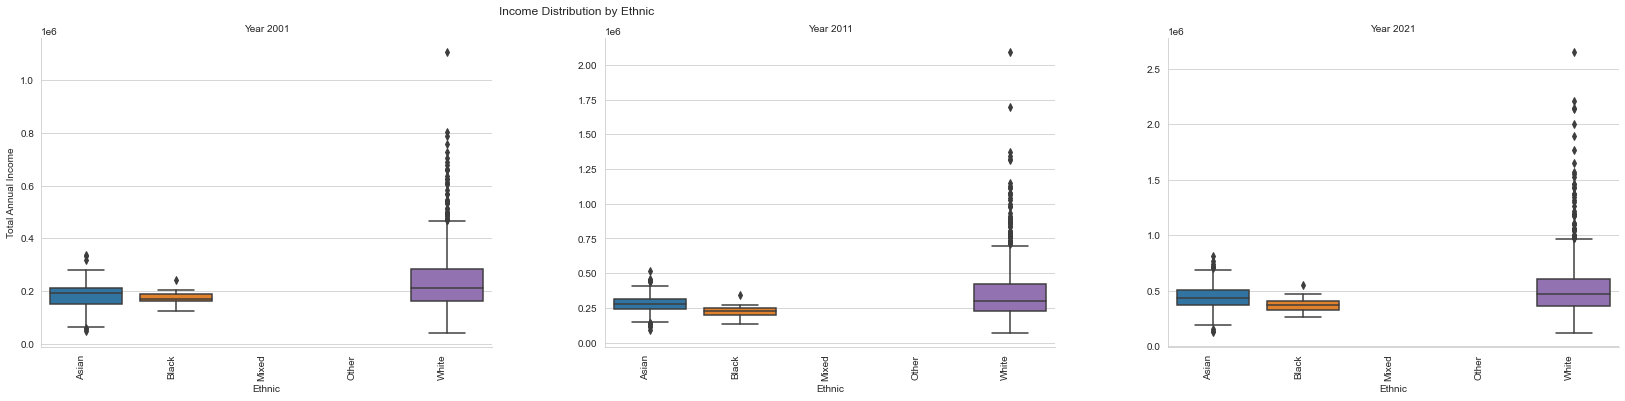

In [30]:
sns.set_style('whitegrid')

g = sns.catplot(data=df_Ethnic, x='Max Ethnic Name', y='Median house price', col='Year', kind='box', col_wrap=3, aspect=1.5, sharey=False)
g.set_axis_labels('Ethnic', 'Total Annual Income')
g.fig.suptitle('Income Distribution by Ethnic', y=1.02, x=0.35)
g.set_xticklabels(rotation=90, ha='right')  
g.set_titles(row_template='{row_name}', col_template='Year {col_name}') 
plt.subplots_adjust(hspace=0.4, wspace=0.25)  
plt.show()

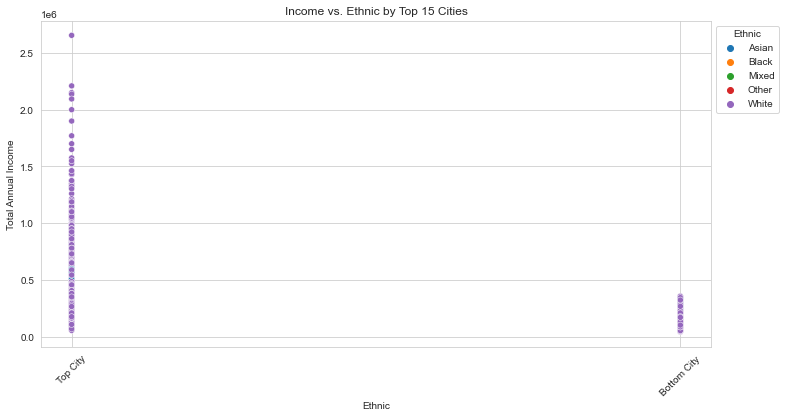

In [31]:
city_counts = df_Ethnic['Study_City'].value_counts()
top_15_cities = city_counts.head(15).index
df_top_15_cities = df_Ethnic[df_Ethnic['Study_City'].isin(top_15_cities)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_15_cities, x='Study_City', y='Median house price', hue='Max Ethnic Name')
plt.xlabel('Ethnic')
plt.ylabel('Total Annual Income')
plt.title('Income vs. Ethnic by Top 15 Cities')
plt.xticks(rotation=45)  
plt.legend(title='Ethnic', bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

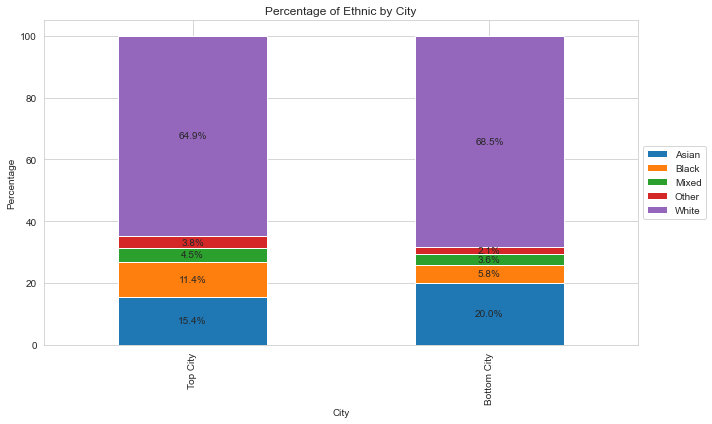

In [32]:
df_Ethnic_grouped = df_Ethnic.groupby('Study_City').sum()
df_Ethnic_grouped = df_Ethnic_grouped.sort_values(by=df_Ethnic_grouped.columns.tolist(), ascending=False).head(15)
df_Ethnic_grouped = df_Ethnic_grouped[['Asian', 'Black', 'Mixed', 'Other', 'White']]
df_Ethnic_percentages = df_Ethnic_grouped.div(df_Ethnic_grouped.sum(axis=1), axis=0).mul(100)


fig, ax = plt.subplots(figsize=(10, 6))
df_Ethnic_percentages.plot(kind='bar', stacked=True, ax=ax)

plt.title('Percentage of Ethnic by City')
plt.xlabel('City')
plt.ylabel('Percentage')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

# Adjust the layout to prevent the percentage labels from overlapping
fig.tight_layout()


In [33]:
Gentrification is often associated with factors such as rising rents and living costs. Therefore, for the purpose of exploratory data analysis (EDA), we conducted studies on various variables to understand the impacts among cities (top 15), by the median household incomes. After the EDA process, we selected six cities: three representing the wealthiest cities (Top 3), namely London, Bristol, and Cardiff, and the other three representing the cities (Bottom 3) with relatively lower median incomes, namely Coventry, Leicester, and Nottingham, from the top 15 cities. For the variables that include this study, including qualification, occupation, industry, and ethnicity. 
Qualification: Among the top 3 cities, 37.5% and 19.5% of the population have Level 4 or above qualifications and no qualifications, respectively. In contrast, the bottom 3 cities have 22.7% and 27.6% with Level 4 or above qualifications and no qualifications, respectively. These figures indicate that the wealthier cities have a higher percentage of highly qualified individuals compared to the poorer cities.
Occupation: In the top 3 cities, the top three occupations are professional (20.5%), Associate Professionals and Technical roles (15.9%), and managers and senior officials (14.0%). Conversely, in the bottom cities, the top three occupations are elementary (16.4%), professional (14.3%), and process, plant, and machine operatives (11.0%).
Industry: Among the top 3 cities, the leading industries are wholesale and retail (13.6%), finance and insurance (10.8%), and professional and technical services (9.2%). On the other hand, the top three industries in the bottom cities are health and wholesale and retail (18.0%), health and social work (10.6%), and manufacturing (7.8%). The top cities exhibit a more diversified distribution of industries, without dominance by specific sectors, indicating a greater industry diversification among them.
Ethnicity: In the top 3 cities, there is a higher proportion of Black, Black British, Black Welsh, Caribbean, or African individuals (11.4%) compared to the bottom 3 cities (5.8%). Conversely, for Asian, Asian British, or Asian Welsh individuals,  with 15.4% in the top 3 cities compared to 20.0% in the bottom 3 cities.

SyntaxError: invalid syntax (<ipython-input-33-83587dabcf41>, line 1)